# FIFA 2025 – Top Players (80+ Overall) – Exploratory Data Analysis

**Objective:**  
Explore the top 486 FIFA 2025 players (rated 80 or higher) to identify performance distributions, outliers, value-to-wage inefficiencies, and build predictive models to estimate market value based on player attributes.

**Data Source:** [Top FIFA Players 80+ OVR from Sofifa (2025) – Kaggle](https://www.kaggle.com/datasets/kshitijsingh2k4/top-fifa-players-80-ovr-from-sofifa-with-value)

**Key Questions:**  

- What do the distributions of Overall, Potential, Value (€), and Wage (€) look like?
- Who are the most overpaid or underpaid players based on performance?
- What features have the strongest correlation with player market value?
- Can we predict a player's value using attributes like Overall, Potential, Age, and Wage?
- Does including the Position (one-hot encoded) improve model accuracy?

Analysis performed in Python using the following libraries: Pandas, Matplotlib, Seaborn, Scikit-learn.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.ticker as ticker

## 1. Dataset Overview

In [24]:
df = pd.read_csv("../data/Top_FIFA_Players_2025_80plus.csv")
df.head() 

,Name,Position,Age,Overall,Potential,Total Stats,Value (€),Wage (€)
0,Rodri,CDM CM,28,91,91,2306,115500000.0,440000.0
1,M. Salah,RM RW,32,91,91,2261,104000000.0,350000.0
2,J. Bellingham,CAM CM,21,90,94,2351,174500000.0,280000.0
3,E. Haaland,ST,23,90,92,2178,157000000.0,270000.0
4,Vini Jr.,LW ST,23,90,94,2059,171500000.0,340000.0


In [25]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         486 non-null    object 
 1   Position     486 non-null    object 
 2   Age          486 non-null    int64  
 3   Overall      486 non-null    int64  
 4   Potential    486 non-null    int64  
 5   Total Stats  486 non-null    int64  
 6   Value (€)    486 non-null    float64
 7   Wage (€)     486 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 30.5+ KB


,Age,Overall,Potential,Total Stats,Value (€),Wage (€)
count,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000
mean,27.524691,82.495885,83.847737,1980.366255,3.727881e+07,90236.625514
std,3.987404,2.433229,3.059793,267.706405,2.562385e+07,59084.524254
min,16.000000,80.000000,80.000000,1104.000000,0.000000e+00,0.000000
25%,25.000000,81.000000,81.000000,1924.250000,2.200000e+07,48000.000000
50%,27.000000,82.000000,83.000000,2063.000000,3.050000e+07,78000.000000
75%,30.000000,84.000000,86.000000,2144.000000,4.450000e+07,120000.000000
max,39.000000,91.000000,95.000000,2351.000000,1.745000e+08,440000.000000


In [26]:
df.isnull().sum()

Name           0
Position       0
Age            0
Overall        0
Potential      0
Total Stats    0
Value (€)      0
Wage (€)       0
dtype: int64

## 2. Distributions – Overall, Potential, Value (€), Wage (€)


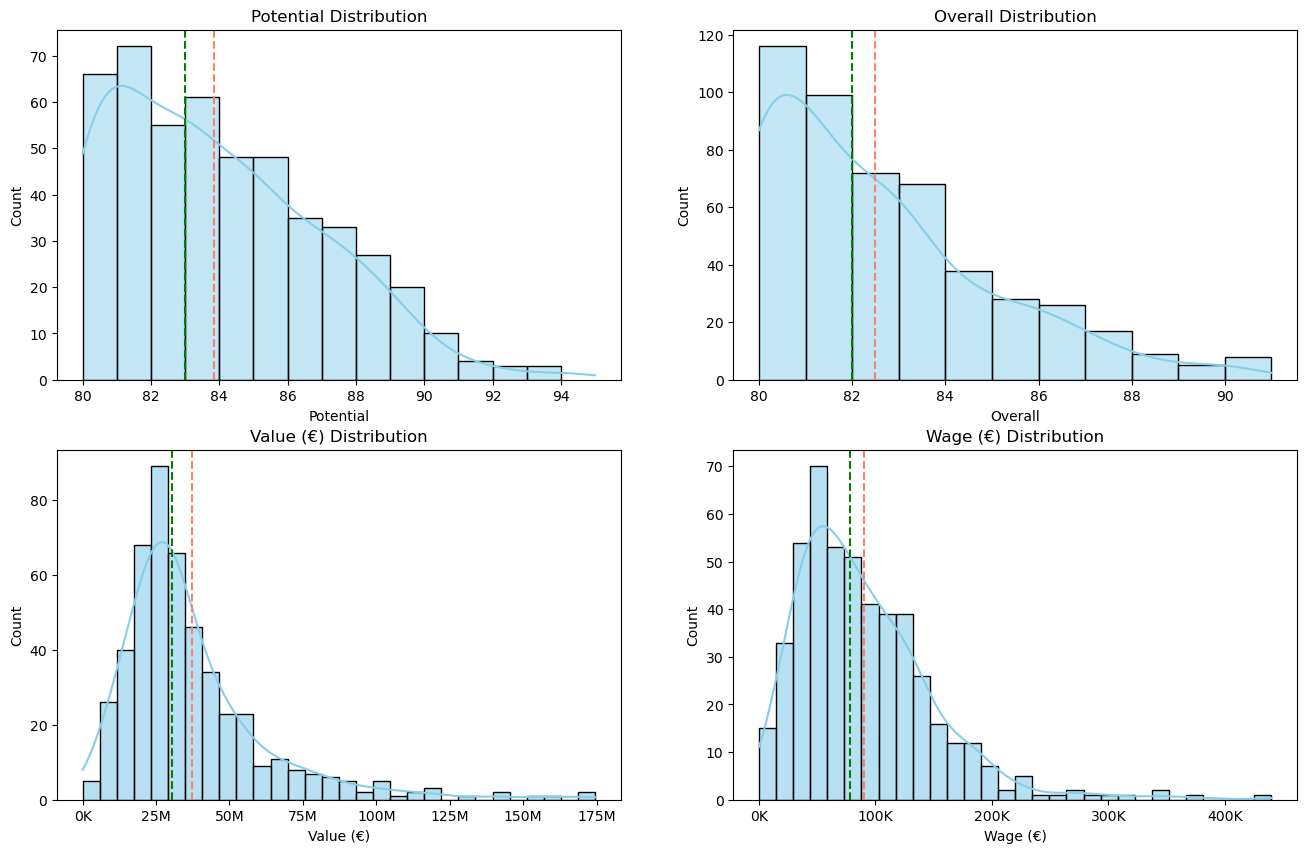

In [27]:
mean_val = df["Value (€)"].mean()
median_val = df["Value (€)"].median()

fig, axes = plt.subplots(2,2,figsize=(16,10))

sns.histplot(df["Overall"], bins=range(80, 92), kde=True, color="skyblue", ax=axes[0,1])
axes[0,1].axvline(df["Overall"].mean(), linestyle="--", color="salmon")
axes[0,1].axvline(df["Overall"].median(), linestyle="--", color="green")
axes[0,1].set_title("Overall Distribution")

sns.histplot(df["Potential"],bins=range(80,95),kde=True,color="skyblue",ax=axes[0,0])
axes[0,0].axvline(df["Potential"].mean(),linestyle="--",color="salmon")
axes[0,0].axvline(df["Potential"].median(),linestyle="--",color="green")
axes[0,0].set_title("Potential Distribution")

sns.histplot(df["Value (€)"], kde=True, ax=axes[1,0], color="skyblue", bins=30, alpha=0.6)
axes[1,0].axvline(df["Value (€)"].mean(), linestyle="--", color="salmon",label=f"Mean: {mean_val:,.0f} €")
axes[1,0].axvline(df["Value (€)"].median(), linestyle="--", color="green",label=f"Median: {median_val:,.0f} €")
axes[1,0].set_title("Value (€) Distribution")
axes[1,0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M' if x >= 1e6 else f'{int(x/1e3)}K'))

sns.histplot(df["Wage (€)"], kde=True, ax=axes[1,1], color="skyblue", bins=30, alpha=0.6)
axes[1,1].axvline(df["Wage (€)"].mean(), linestyle="--", color="salmon",label=f"Mean: {mean_val:,.0f} €")
axes[1,1].axvline(df["Wage (€)"].median(), linestyle="--", color="green",label=f"Median: {median_val:,.0f} €")
axes[1,1].set_title("Wage (€) Distribution")
axes[1,1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M' if x >= 1e6 else f'{int(x/1e3)}K'))

## 3. Top Players – Overall vs Potential


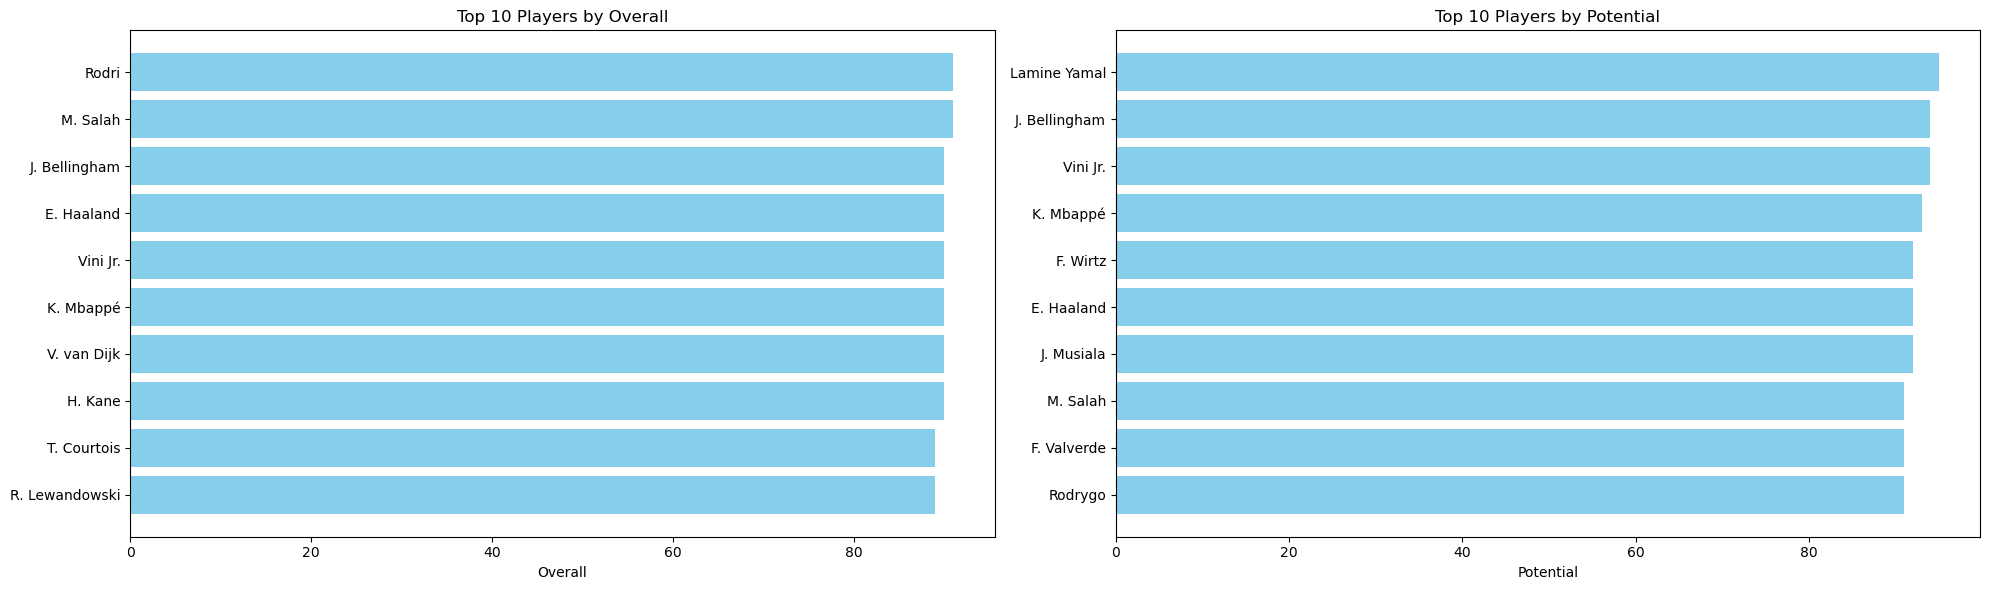

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

top_players_by_overall = df.sort_values("Overall", ascending=False).head(10)
x1 = top_players_by_overall["Overall"]
y1 = top_players_by_overall["Name"]

top_players_by_potential = df.sort_values("Potential", ascending=False).head(10)
x2 = top_players_by_potential["Potential"]
y2 = top_players_by_potential["Name"]

axes[0].barh(y1, x1, color="skyblue")
axes[0].invert_yaxis()
axes[0].set_title("Top 10 Players by Overall")
axes[0].set_xlabel("Overall")

axes[1].barh(y2, x2, color="skyblue")
axes[1].invert_yaxis()
axes[1].set_title("Top 10 Players by Potential")
axes[1].set_xlabel("Potential")

plt.tight_layout()
plt.show()

## 4. Overpaid vs Underpaid – Value to Wage Ratio


In [29]:
df["Value to Wage Ratio"] = df["Value (€)"]/df["Wage (€)"]
df_overpaid = df[(df["Value (€)"] > 0)&(df["Wage (€)"] > 0)].sort_values(by="Value to Wage Ratio",ascending=False).tail(10)
df_underpaid = df[(df["Value (€)"] > 0)&(df["Wage (€)"] > 0)].sort_values(by="Value to Wage Ratio",ascending=False).head(10)

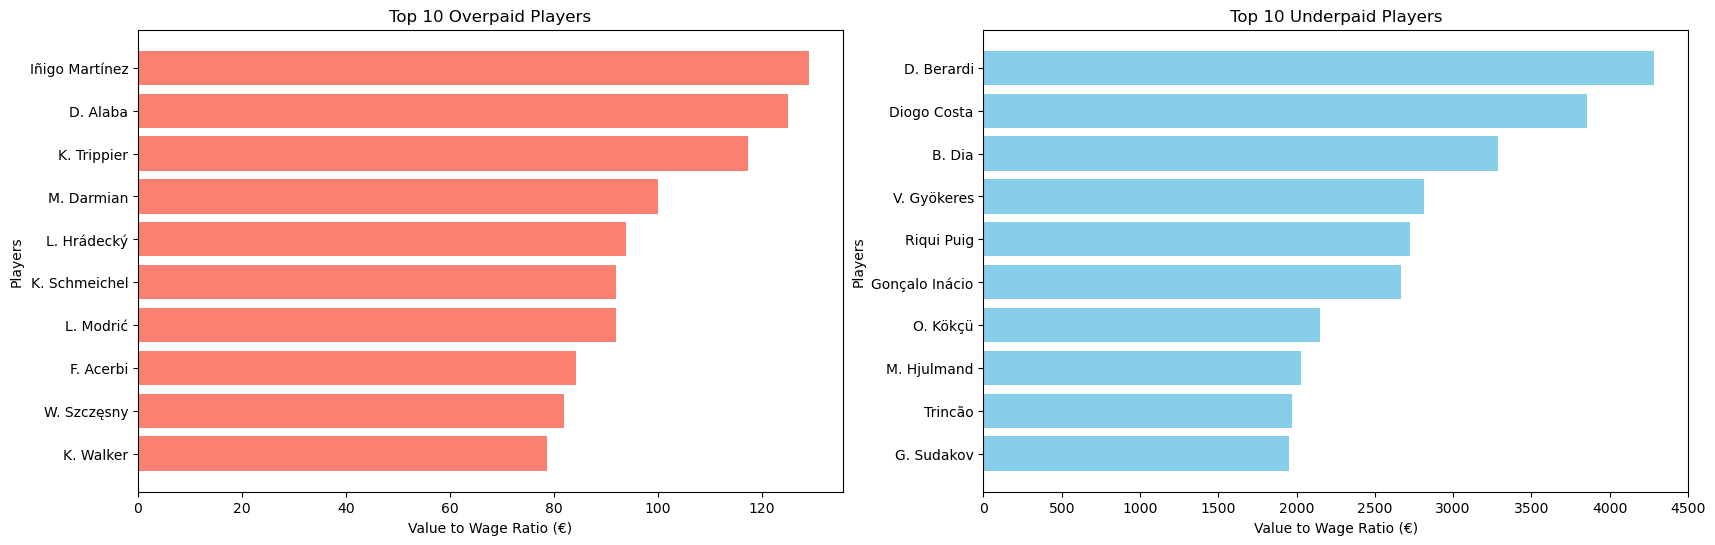

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
x1 = df_overpaid["Name"]
y1 = df_overpaid["Value to Wage Ratio"]

axes[0].barh(x1,y1,color="salmon")
axes[0].invert_yaxis()
axes[0].set_title("Top 10 Overpaid Players")
axes[0].set_ylabel("Players")
axes[0].set_xlabel("Value to Wage Ratio (€)")

x2 = df_underpaid["Name"]
y2 = df_underpaid["Value to Wage Ratio"]

axes[1].barh(x2,y2,color="skyblue")
axes[1].invert_yaxis()
axes[1].set_title("Top 10 Underpaid Players")
axes[1].set_ylabel("Players")
axes[1].set_xlabel("Value to Wage Ratio (€)")

plt.show()

## 5. Attribute Comparison – Overpaid vs Underpaid


In [31]:
features_to_compare = ["Age", "Overall", "Potential", "Total Stats"]
print(df_overpaid[features_to_compare].mean().round(1))
print(df_underpaid[features_to_compare].mean().round(1))

Age              34.5
Overall          82.9
Potential        82.9
Total Stats    1877.0
dtype: float64
Age              24.5
Overall          81.6
Potential        85.3
Total Stats    1972.8
dtype: float64


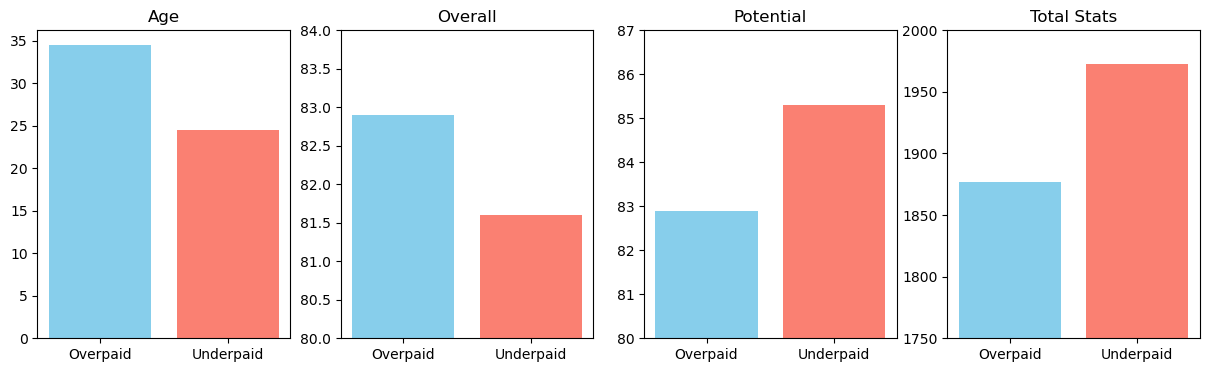

In [32]:
fig,axes = plt.subplots(1,4,figsize=(15,4))

age_overpaid = df_overpaid["Age"].mean()
age_underpaid = df_underpaid["Age"].mean()

axes[0].bar(["Overpaid","Underpaid"],[age_overpaid,age_underpaid],color=["skyblue","salmon"])
axes[0].set_title("Age")

overall_overpaid = df_overpaid["Overall"].mean()
overall_underpaid = df_underpaid["Overall"].mean()

axes[1].bar(["Overpaid","Underpaid"],[overall_overpaid,overall_underpaid],color=["skyblue","salmon"])
axes[1].set_title("Overall")
axes[1].set_ylim(80,84)

potential_overpaid = df_overpaid["Potential"].mean()
potential_underpaid = df_underpaid["Potential"].mean()

axes[2].bar(["Overpaid","Underpaid"],[potential_overpaid,potential_underpaid],color=["skyblue","salmon"])
axes[2].set_title("Potential")
axes[2].set_ylim(80,87)

total_overpaid = df_overpaid["Total Stats"].mean()
total_underpaid = df_underpaid["Total Stats"].mean()

axes[3].bar(["Overpaid","Underpaid"],[total_overpaid,total_underpaid],color=["skyblue","salmon"])
axes[3].set_title("Total Stats")
axes[3].set_ylim(1750,2000)

plt.show()

## 6. Correlation Matrix


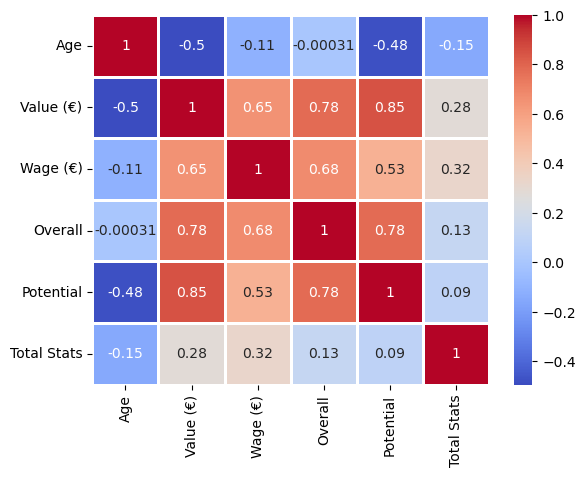

In [33]:
correlation = df[["Age","Value (€)","Wage (€)","Overall","Potential","Total Stats"]].corr()
sns.heatmap(correlation,cmap="coolwarm",linewidth=1,annot=True)
plt.show()

## 7. Value (€) Prediction – Linear Regression


In [34]:
X = df[["Age","Wage (€)","Overall","Potential"]]
y = df["Value (€)"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test,y_pred)
print(r2_score(y_test,y_pred))

0.8465423214112399


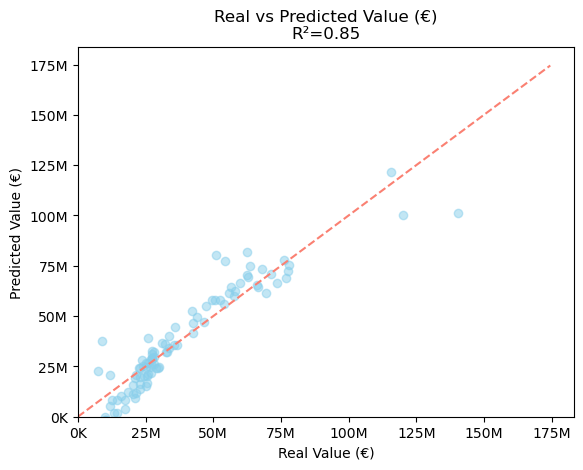

In [35]:
plt.scatter(y_test,y_pred,color="skyblue",alpha=0.5)
plt.xlabel("Real Value (€)")
plt.ylabel("Predicted Value (€)")
plt.title(f"Real vs Predicted Value (€)\nR²={r2:.2}")
plt.plot([y.min(),y.max()],[y.min(),y.max()],linestyle="--",color="salmon")

plt.ylim(bottom=0)
plt.xlim(left=0)

ax = plt.gca()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(
    lambda x, pos: f'{int(x/1e6)}M' if x >= 1e6 else f'{int(x/1e3)}K'
))

ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda y, pos: f'{int(y/1e6)}M' if y >= 1e6 else f'{int(y/1e3)}K'
))

## 8. Model Improvement – With Position Encoding


In [36]:
df_exp = df.copy()
df_exp = df_exp.assign(Position=df_exp["Position"].str.split()).explode("Position")
df_exp.head()

,Name,Position,Age,Overall,Potential,Total Stats,Value (€),Wage (€),Value to Wage Ratio
0,Rodri,CDM,28,91,91,2306,115500000.0,440000.0,262.500000
0,Rodri,CM,28,91,91,2306,115500000.0,440000.0,262.500000
1,M. Salah,RM,32,91,91,2261,104000000.0,350000.0,297.142857
1,M. Salah,RW,32,91,91,2261,104000000.0,350000.0,297.142857
2,J. Bellingham,CAM,21,90,94,2351,174500000.0,280000.0,623.214286


In [37]:
df_onehot = pd.get_dummies(df_exp, columns=["Position"])
df_onehot.head()

,Name,Age,Overall,Potential,Total Stats,Value (€),Wage (€),Value to Wage Ratio,Position_CAM,Position_CB,Position_CDM,Position_CM,Position_GK,Position_LB,Position_LM,Position_LW,Position_RB,Position_RM,Position_RW,Position_ST
0,Rodri,28,91,91,2306,115500000.0,440000.0,262.500000,False,False,True,False,False,False,False,False,False,False,False,False
0,Rodri,28,91,91,2306,115500000.0,440000.0,262.500000,False,False,False,True,False,False,False,False,False,False,False,False
1,M. Salah,32,91,91,2261,104000000.0,350000.0,297.142857,False,False,False,False,False,False,False,False,False,True,False,False
1,M. Salah,32,91,91,2261,104000000.0,350000.0,297.142857,False,False,False,False,False,False,False,False,False,False,True,False
2,J. Bellingham,21,90,94,2351,174500000.0,280000.0,623.214286,True,False,False,False,False,False,False,False,False,False,False,False


In [38]:
features = ["Age","Overall","Potential","Total Stats", "Wage (€)"]
all_features = features + [col for col in df_onehot.columns if col.startswith("Position_")]

X = df_onehot[all_features]
y = df_onehot["Value (€)"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

0.8782121644612377


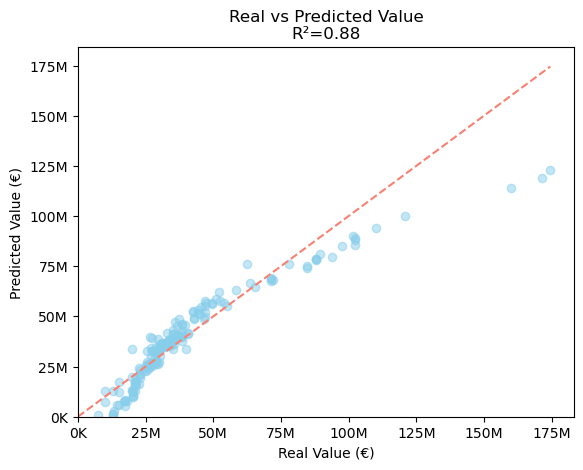

In [39]:
plt.scatter(y_test,y_pred,color="skyblue",alpha=0.5)
plt.xlabel("Real Value (€)")
plt.ylabel("Predicted Value (€)")
plt.title(f"Real vs Predicted Value\nR²={r2:.2}")
plt.plot([y.min(),y.max()],[y.min(),y.max()],linestyle="--",color="salmon")

plt.ylim(bottom=0)
plt.xlim(left=0)

ax = plt.gca()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(
    lambda x, pos: f'{int(x/1e6)}M' if x >= 1e6 else f'{int(x/1e3)}K'
))

ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda y, pos: f'{int(y/1e6)}M' if y >= 1e6 else f'{int(y/1e3)}K'
))

plt.show()

## 9. Predicting a Custom Player


In [40]:
player = {feat: 0 for feat in all_features}

player.update ({
    "Age":20,
    "Overall":80,
    "Potential":95,
    "Wage (€)":30000,
    "Total Stats":1800
})

player["Position_GK"] = 1

player_df = pd.DataFrame([player])

for col in features:
    if col not in player_df.columns:
        player_df[col] = 0

player_df

,Age,Overall,Potential,Total Stats,Wage (€),Position_CAM,Position_CB,Position_CDM,Position_CM,Position_GK,Position_LB,Position_LM,Position_LW,Position_RB,Position_RM,Position_RW,Position_ST
0,20,80,95,1800,30000,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
predicted_player_value = model.predict(player_df)[0]
predicted_formatted = f"€ {predicted_player_value:,.0f}"
print(predicted_formatted)

€ 41,763,699


# Final Conclusions

**Right-skewed value & wage distribution**  
Most top FIFA players have market values between €20M–€50M, with a long tail of elite players reaching over €150M. Weekly wages are similarly skewed, with the majority under €100K and a few outliers exceeding €400K.

**Top-performing players**  
Players like Rodri, M. Salah, Bellingham, and Haaland have the highest Overall ratings. The top Potential players include Lamine Yamal, Bellingham, and Wirtz, highlighting rising stars with strong future value.

**What influences market value?**  
The strongest positive correlations with player value are:
- Wage (€): ≈ 0.85  
- Potential: ≈ 0.83  
- Overall: ≈ 0.78  
Age shows a negative correlation (≈ -0.50), confirming that younger players tend to have higher market value. Total Stats has a weaker influence (≈ 0.28).

**Overpaid vs Underpaid profile**  
Underpaid players are typically younger, with higher Potential, better Overall, and stronger Total Stats. Overpaid players are often older, with declining stats and disproportionately high wages compared to their value.

**Regression results**  
A simple linear regression using Age, Wage, Overall, and Potential achieves R² ≈ 0.85, explaining around 85% of value variance.  
When Position is included via one-hot encoding, the model improves to R² ≈ 0.88, confirming that playing role also contributes to value prediction.

**Use cases**  
This model can be applied to:
- Predict player market value
- Identify undervalued high-potential talent
- Spot overpaid and declining players
- Simulate value scenarios for custom profiles or scouting analysis
